## Womens Clothing E-Commerce
## Contents
- [Womens Clothing E-Commerce Reviews](#Womens-Clothing-E-Commerce-Reviews)
- [Task](#Task)
- [1.Reading Data](#1.Reading-Data)
- [2.Feature Selection](#2.Feature-Selection)
 - [2.1.Unnecessary Columns](#2.1.Unnecessary-Columns)
 - [2.2.Delete the gaps of string variable](#2.2.Delete-the-gaps-of-string-variable)
 - [2.3."Title" & "Review_Text" simplification](#2.3."Title"-&-"Review_Text"-simplification)
- [3.Exploratory Data Analysis](#3.Exploratory-Data-Analysis)
 - [3.1.Categorical Data](#3.1.Categorical-Data)
 - [3.2.Numerical Data](#3.2.Numerical-Data)
  - [Histogram](#Histogram)
  - [Density Function](#Density-Function)
  - [Box Plot](#Box-Plot)
 - [3.3.Testing for Multicollinearity with Variance Inflation Factors (VIF)](#3.3.Testing-for-Multicollinearity-with-Variance-Inflation-Factors-(VIF))
- [4.Data Preparation](#4.Data-Preparation)
 - [4.1.Imputing Missing Data](#4.1.Imputing-Missing-Data)
 - [4.2.Dummy Variable](#4.2.Dummy-Variable)
 - [4.3.Creating Train and Test Data](#4.3.Creating-Train-and-Test-Data)
 - [4.4.Imbalanced Data](#4.4.Imbalanced-Data)
- [5.Modelling](#5.Modelling)
 - [5.1.Logistic Regression](#5.1.Logistic-Regression)
 - [5.2.k-Nearest Neighbors](#5.2.k-Nearest-Neighbors)
 - [5.3.Random Forest](#5.3.Random-Forest)
 - [5.4.Support Vector Machine](#5.4.Support-Vector-Machine)
 - [5.5.Naive Bayes (Bernoulli)](#5.5.Naive-Bayes-(Bernoulli))
- [6.Conclusion and Model Comparison](#6.Conclusion-and-Model-Comparison)

## Womens Clothing E-Commerce Reviews
Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

## Task
The goal of this project is to find a solution to the following question. The available features are used to estimate whether or not a user will recommend a product.

## 1.Reading Data

In [89]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [90]:
pwd = os.getcwd()

In [91]:
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv",skiprows=1, header= None,names=['Unnamed: 0', 'Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name'])

In [92]:
data.head()

,Unnamed: 0,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## 2.Feature Selection

#### 2.1.Unnecessary Columns

In [93]:
data = data.drop(data.columns[0:2], axis=1)

#### 2.2.Delete the gaps of string variable

In [94]:
def delete_gaps(data, column):
    data[column] = data[column].str.strip()

In [95]:
delete_gaps(data, "Title")
delete_gaps(data, "Review_Text")
delete_gaps(data, "Division_Name")
delete_gaps(data, "Department_Name")
delete_gaps(data, "Class_Name")

#### 2.3."Title" & "Review_Text" simplification

In [96]:
from textblob import TextBlob
import nltk

**Sentiment:**
- Comments and titles were scored according to their polarity, which we obtained as a result of sentiment analysis.

In [97]:
point = 0 
for i, s in enumerate(data.Title): 
    if s == "NaN":
        continue
    else:
        blob = TextBlob(str(s)) 
        degree = blob.sentiment[0]
        if degree >= 0.5:
            point = 5
        elif degree > 0:
            point = 4
        elif degree == 0:
            point = 3
        elif degree >= -0.5:
            point = 2
        else:
            point = 1
        data.Title[i] = point

C:\Users\Gaye\AppData\Local\Temp/ipykernel_7868/743720809.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Title[i] = point


In [98]:
point = 0 
for i, s in enumerate(data.Review_Text): 
    if s == "NaN":
        continue
    else:
        blob = TextBlob(str(s)) 
        degree = blob.sentiment[0]
        if degree >= 0.5:
            point = 5
        elif degree > 0:
            point = 4
        elif degree == 0:
            point = 3
        elif degree >= -0.5:
            point = 2
        else:
            point = 1
        data.Review_Text[i] = point

C:\Users\Gaye\AppData\Local\Temp/ipykernel_7868/2449755717.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Review_Text[i] = point


In [99]:
data.head()

,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,33,3,5,4,1,0,Initmates,Intimate,Intimates
1,34,3,4,5,1,4,General,Dresses,Dresses
2,60,4,4,3,0,0,General,Dresses,Dresses
3,50,5,5,5,1,0,General Petite,Bottoms,Pants
4,47,3,5,5,1,6,General,Tops,Blouses


## 3.Exploratory Data Analysis

#### 3.1.Categorical Data

In [100]:
data.columns

Index(['Age', 'Title', 'Review_Text', 'Rating', 'Recommended_IND',
       'Positive_Feedback_Count', 'Division_Name', 'Department_Name',
       'Class_Name'],
      dtype='object')

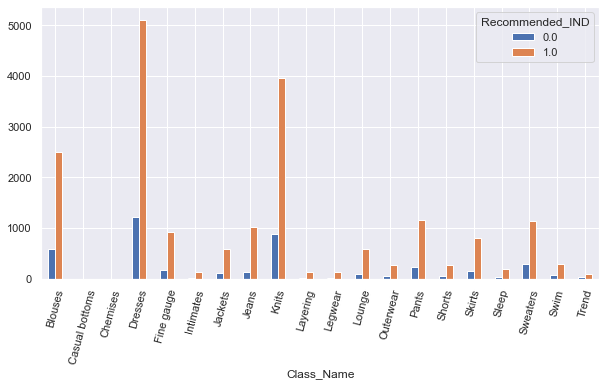

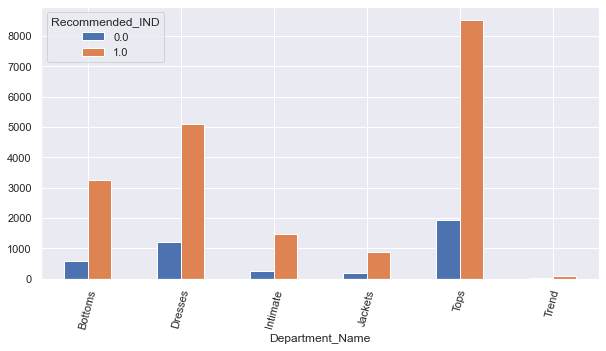

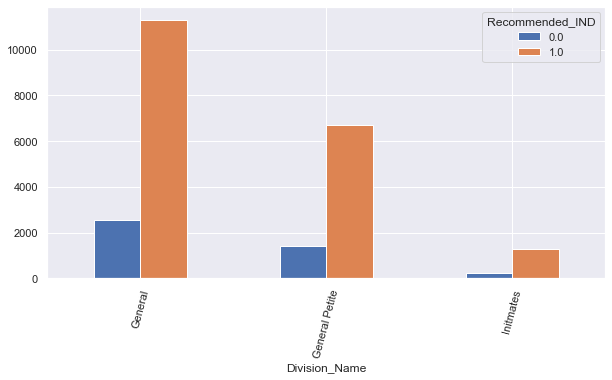

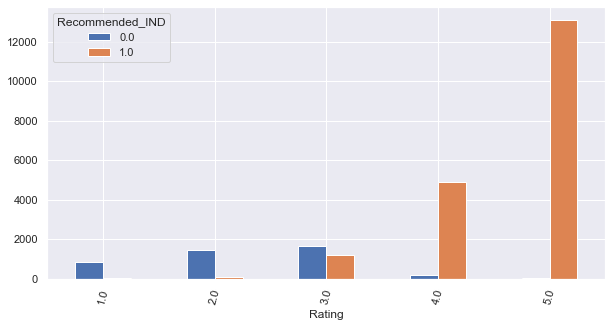

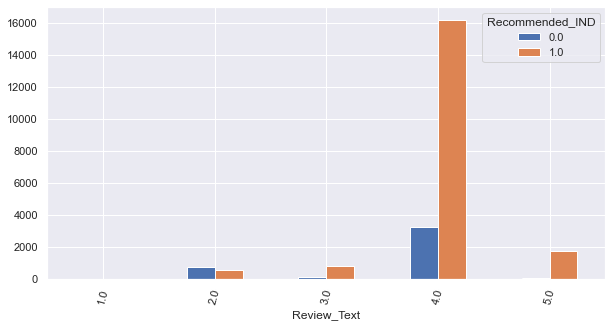

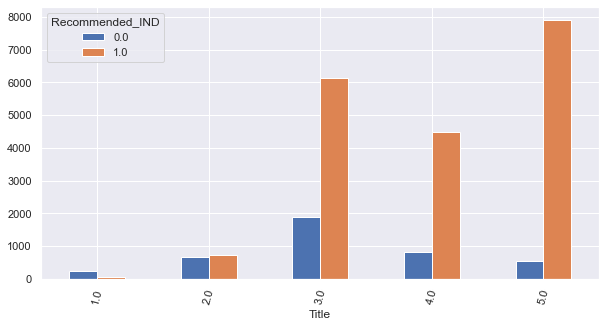

In [130]:
sns.set()
pd.crosstab(data.Class_Name, data.Recommended_IND).plot(kind="bar", figsize=(10,5), rot=75)
pd.crosstab(data.Department_Name, data.Recommended_IND).plot(kind="bar", figsize=(10,5), rot=75)
pd.crosstab(data.Division_Name, data.Recommended_IND).plot(kind="bar", figsize=(10,5), rot=75)
pd.crosstab(data.Rating, data.Recommended_IND).plot(kind="bar", figsize=(10,5), rot=75)
pd.crosstab(data.Review_Text, data.Recommended_IND).plot(kind="bar", figsize=(10,5), rot=75)
pd.crosstab(data.Title, data.Recommended_IND).plot(kind="bar", figsize=(10,5), rot=75)
plt.show()

In [102]:
print(data.groupby(by="Recommended_IND").mean())

                       Age    Rating  Positive_Feedback_Count
Recommended_IND                                              
0                42.389501  2.303691                 3.383030
1                43.373304  4.604794                 2.352956


- The average ages of recommenders and non-recommenders are similar. 
- Their average rating is half. 
- Reviews where products are not recommended(Recommended_IND=0, "Positive_Feedback_Count") seem to be more beneficial on average.

#### 3.2.Numerical Data

In [103]:
data.describe()

,Age,Rating,Recommended_IND,Positive_Feedback_Count
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,0.822362,2.535936
std,12.279544,1.110031,0.382216,5.702202
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


- "Age" has different values by the others so that data will scaled before the modelling section.

#### Histogram
A Histogram is a chart plotting a variable, like time, against the number of occurrences in the variable category. Histograms are good for showing general distributional features of dataset variables.

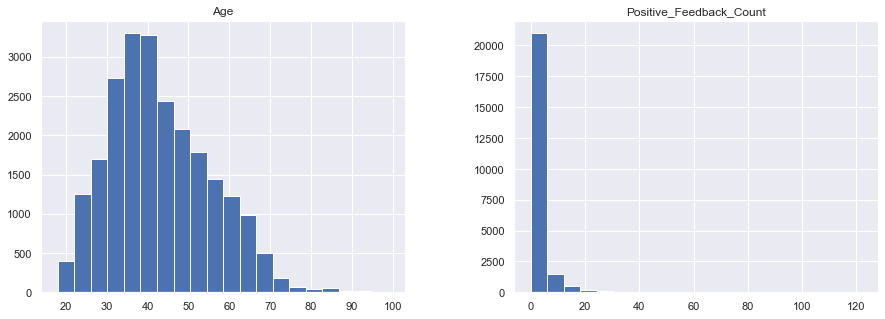

In [104]:
data[["Age", "Positive_Feedback_Count"]].hist(bins=20, figsize=(15,5))
plt.show()

- "Age" data has a normal distribution, however our "Positive_Feedback_Count" dataset has an accumulation in a specific range.

#### Density Function
Probability density function (PDF) is a statistical expression that defines a probability distribution (the likelihood of an outcome) for a discrete random variable (e.g., a stock or ETF) as opposed to a continuous random variable.

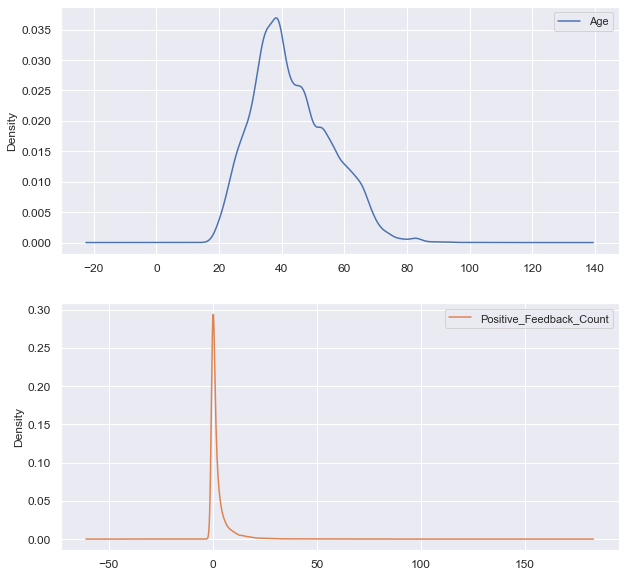

In [105]:
data[["Age", "Positive_Feedback_Count"]].plot(kind= 'density', subplots=True, sharex=False, sharey=False, fontsize=12, figsize=(10,10))
plt.show()

#### Box Plot
A box plot is a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum.

In [106]:
def box_plot(column):
    Q1, Q2, Q3 = np.quantile(data[[column]], [0.25, 0.50, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    data[[column]].plot(kind= 'box')
    plt.text(1.25, 50,f"UB:  {upper_bound}\nQ3:  {Q3}\nQ2:  {Q2}\nQ1:  {Q1}\nLB:  {lower_bound}")
    plt.show()

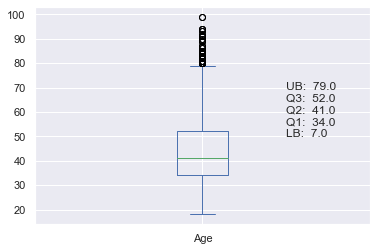

In [107]:
box_plot("Age")

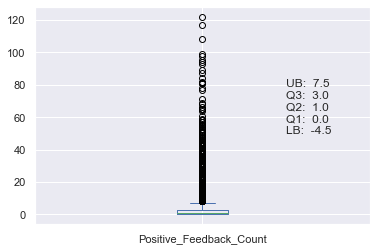

In [108]:
box_plot("Positive_Feedback_Count")

 - According to the histogram, density and box plot, it is seen that the majority of the "Positive_Feedback_Count" feature takes a value between 0-10. So, it has been removed from our data set as it will have a very low effect on our model.

In [109]:
data = data.drop(columns="Positive_Feedback_Count")

#### 3.3.Testing for Multicollinearity with Variance Inflation Factors (VIF)
Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

The variance inflation factor (VIF) identifies correlation between independent variables and the strength of that correlation.VIFs start at 1 and have no upper limit. 
- VIFs between 1 and 5 suggest that there is a moderate correlation.
- VIFs greater than 5 represent critical levels of multicollinearity where the coefficients are poorly estimated, and the p-values are questionable.

[source1](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)

In [110]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
data.Title = data.Title.astype("int") 
data.Review_Text = data.Review_Text.astype("int")

In [112]:
data_num = data._get_numeric_data() #drop non-numeric cols
data_num = data_num.dropna() #subset the dataframe

In [113]:
data_num.columns

Index(['Age', 'Title', 'Review_Text', 'Rating', 'Recommended_IND'], dtype='object')

In [114]:
#run multiple regression
features = "+".join(['Age', 'Title', 'Review_Text', 'Rating'])

# get y and X dataframes based on this regression:
y, X = dmatrices('Recommended_IND ~' + features, data_num, return_type='dataframe')

In [115]:
#calulate VIF factors
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [116]:

vif.round(2)

,VIF Factor,features
0,65.48,Intercept
1,1.00,Age
2,1.15,Title
3,1.10,Review_Text
4,1.19,Rating


- All VIF values between 1 and 5 suggest that there is a moderate correlation, there is no a high variance inflation factor.

## 4.Data Preparation

#### 4.1.Imputing Missing Data
All imputing means is to make an educated guess as to what the missing values could be. A common strategy is, in any given column with missing values, to compute the mean of all the non-missing entries and to replace all missing values with the mean.

In [66]:
data.info()
data.isnull().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              23472 non-null  float64
 1   Title            23472 non-null  int32  
 2   Review_Text      23472 non-null  int32  
 3   Rating           23472 non-null  float64
 4   Recommended_IND  23472 non-null  float64
 5   Division_Name    23472 non-null  object 
 6   Department_Name  23472 non-null  object 
 7   Class_Name       23472 non-null  object 
dtypes: float64(3), int32(2), object(3)
memory usage: 1.4+ MB


Age                False
Title              False
Review_Text        False
Rating             False
Recommended_IND    False
Division_Name      False
Department_Name    False
Class_Name         False
dtype: bool

In [67]:
data.fillna(np.nan)

,Age,Title,Review_Text,Rating,Recommended_IND,Division_Name,Department_Name,Class_Name
0,33.0,3,5,4.0,1.0,Initmates,Intimate,Intimates
1,34.0,3,4,5.0,1.0,General,Dresses,Dresses
2,60.0,4,4,3.0,0.0,General,Dresses,Dresses
3,50.0,5,5,5.0,1.0,General Petite,Bottoms,Pants
4,47.0,3,5,5.0,1.0,General,Tops,Blouses
...,...,...,...,...,...,...,...,...
23481,34.0,5,5,5.0,1.0,General Petite,Dresses,Dresses
23482,48.0,3,4,3.0,1.0,General Petite,Tops,Knits
23483,31.0,5,4,3.0,0.0,General Petite,Dresses,Dresses
23484,28.0,5,4,3.0,1.0,General,Dresses,Dresses


In [118]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# SimpleImputer the features: data.iloc[:,:5]
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imp.fit(data.iloc[:,:5])
data.iloc[:,:5] = imp.transform(data.iloc[:,:5])

Since the number of null data in "Division_Name", "Department_Name" and "Class_Name" are few rows not to affect our model, the rows have been deleted.

In [119]:
data.iloc[:,5:]

,Division_Name,Department_Name,Class_Name
0,Initmates,Intimate,Intimates
1,General,Dresses,Dresses
2,General,Dresses,Dresses
3,General Petite,Bottoms,Pants
4,General,Tops,Blouses
...,...,...,...
23481,General Petite,Dresses,Dresses
23482,General Petite,Tops,Knits
23483,General Petite,Dresses,Dresses
23484,General,Dresses,Dresses


In [120]:
data.dropna(inplace=True)

#### 4.2.Dummy Variable
Sckit-learn doesn't accept categorical features by default. We need to ancode categorical features numerically. Simply, We will convert to "dummy variable"
- 0: Observation was NOT that categroy
- 1: Observation was that category

In [121]:
dum_data = pd.get_dummies(data)

In [122]:
dum_data.head()

,Age,Title,Review_Text,Rating,Recommended_IND,Division_Name_General,Division_Name_General Petite,Division_Name_Initmates,Department_Name_Bottoms,Department_Name_Dresses,...,Class_Name_Legwear,Class_Name_Lounge,Class_Name_Outerwear,Class_Name_Pants,Class_Name_Shorts,Class_Name_Skirts,Class_Name_Sleep,Class_Name_Sweaters,Class_Name_Swim,Class_Name_Trend
0,33.0,3.0,5.0,4.0,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34.0,3.0,4.0,5.0,1.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,60.0,4.0,4.0,3.0,0.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,50.0,5.0,5.0,5.0,1.0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,47.0,3.0,5.0,5.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 4.3.Creating Train and Test Data
A strategy for measuring the performance of a machine learning algorithm is the train-test split. It can be used for any supervised learning technique and can be utilized for classification or regression tasks.

In [123]:
#import train_test_split
from sklearn.model_selection import train_test_split

X = dum_data[['Age', 'Title', 'Review_Text', 'Rating', 'Division_Name_General','Division_Name_General Petite', 'Division_Name_Initmates','Department_Name_Bottoms', 'Department_Name_Dresses','Department_Name_Intimate', 'Department_Name_Jackets','Department_Name_Tops', 'Department_Name_Trend', 'Class_Name_Blouses','Class_Name_Casual bottoms', 'Class_Name_Chemises','Class_Name_Dresses', 'Class_Name_Fine gauge', 'Class_Name_Intimates','Class_Name_Jackets', 'Class_Name_Jeans', 'Class_Name_Knits','Class_Name_Layering', 'Class_Name_Legwear', 'Class_Name_Lounge','Class_Name_Outerwear', 'Class_Name_Pants', 'Class_Name_Shorts','Class_Name_Skirts', 'Class_Name_Sleep', 'Class_Name_Sweaters','Class_Name_Swim', 'Class_Name_Trend']]
y =dum_data["Recommended_IND"]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 4.4.Imbalanced Data
Data is imbalaced. SMOTE tecnique will be used to solve this problem

In [124]:
y_train.value_counts()

1.0    13539
0.0     2891
Name: Recommended_IND, dtype: int64

**Oversampling to remove class imbalance using SMOTE** \
Unbalanced categorization has the drawback of having too few examples of the minority class for a model to learn the decision boundary adequately.

Oversampling the examples in the minority class is one technique to tackle this problem. This can be accomplished by simply duplicating minority class samples in the training dataset before fitting a model. This can help to balance the class distribution, but it doesn't give the model any extra information.

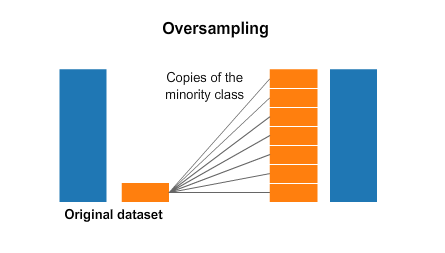

In [125]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))


Before oversampling:  Counter({1.0: 13539, 0.0: 2891})
After oversampling:  Counter({0.0: 13539, 1.0: 13539})


## 5.Modelling

In [79]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### 5.1.Logistic Regression
For binary classification, we will utilize logistic regression or log reg studies once we have two alternative labels for the target variable. \
Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C. **C controls** the inverse of the regularization strength. A large **C** can lead to an overfit model, while a small can lead to an underfit model. C:"Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization."

- **Scaling data** \
"Age" has a different scale than others. If there are features on far larger scales, they can unduly influence our model.Given any column, you can subtract the mean and divide by the variance so that all features are centred around zero and have variance one. This is called standardization. We'll use standardization to scale data.

- **Pipeline** \
There are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. The entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process.

- **GridSearchCV** \
We also knew that we had to choose a value for the alpha in ridge and lasso regression before fitting it. Analogously, before fitting and predicting K-nearest neighbors, we need to choose n neighbors. Such parameters, ones that need to be specified before fitting a model, are called hyperparameters. In other words, these are parameters that cannot be explicitly learned by fitting the model. Here in lies a fundamental key for building a successful model: choosing the correct hyperparameter. \
We then perform k-fold cross-validation for each point in the grid, that is, for each choice of hyperparameter or combination of hyperparameters. We then choose for our model the choice of hyperparameters that performed the best. This is called a grid search and in scikit-learn we implement it using the class GridSearchCV.

- **5-fold cross-validation** \
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model. The model is not only trained, but also tested on all of the available data. \
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this project, we will use cv=5 to perform 5-fold cross-validation.

C:\Users\Gaye\anaconda3\envs\minimal_ds2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


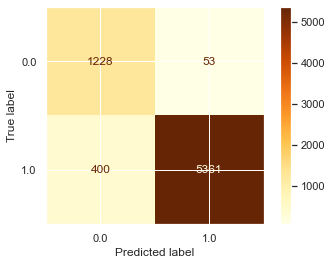

              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84      1281
         1.0       0.99      0.93      0.96      5761

    accuracy                           0.94      7042
   macro avg       0.87      0.94      0.90      7042
weighted avg       0.95      0.94      0.94      7042



In [83]:
# Setup the pipeline
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression(max_iter=500))]

pipeline = Pipeline(steps)

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'logreg__C': c_space}

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(pipeline, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg_cv.predict(X_test)

# Compute and print  the confusion matrix and classification report
plot_confusion_matrix(logreg_cv, X_test, y_test, cmap='YlOrBr')  
plt.show()

print(classification_report(y_test, y_pred))

### 5.2.k-Nearest Neighbors
The KNN (K-Nearest Neighbors) Algorithm predicts two fundamental values:
- The distance between the point being estimated and other points is calculated. The Minkowski distance computation function is used for this.
- K (neighbors): We specify the number of closest neighbors to calculate. The K value has a direct impact on the outcome.
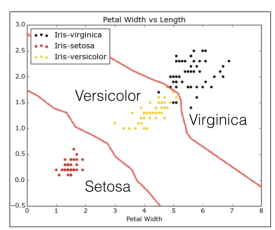
 - Any new data point here will be predicted 'setosa',

 - Any new data point here will be predicted 'virginica',

 - And any new data point here will be predicted 'versicolor

C:\Users\Gaye\anaconda3\envs\minimal_ds2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


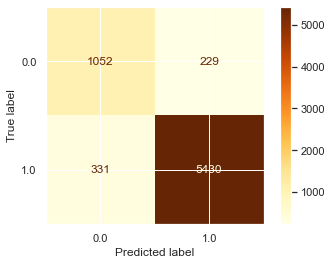

              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79      1281
         1.0       0.96      0.94      0.95      5761

    accuracy                           0.92      7042
   macro avg       0.86      0.88      0.87      7042
weighted avg       0.92      0.92      0.92      7042



In [84]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=3))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

y_pred = knn_scaled.predict(X_test)

# Compute and print  the confusion matrix and classification report
plot_confusion_matrix(knn_scaled, X_test, y_test, cmap='YlOrBr')  
plt.show()

print(classification_report(y_test, y_pred))

### 5.3.Random Forest
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).
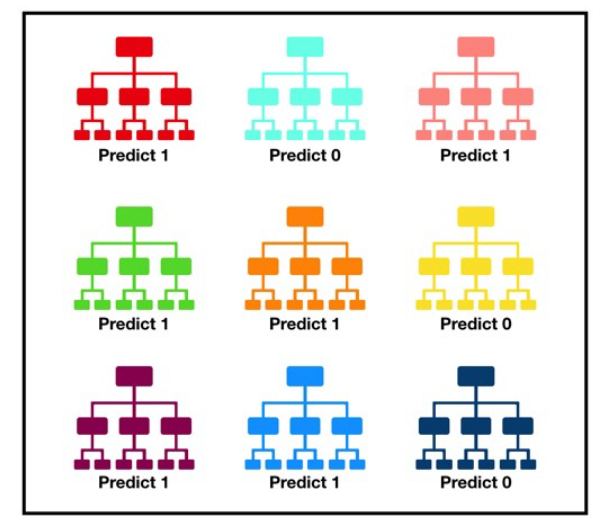


[Source](https://towardsdatascience.com/understanding-random-forest-58381e0602d2#:~:text=The%20random%20forest%20is%20a,that%20of%20any%20individual%20tree.)
[türkçe açıklamalaı](https://medium.com/data-science-tr/makine-%C3%B6%C4%9Frenmesi-dersleri-5-bagging-ve-random-forest-2f803cf21e07)

C:\Users\Gaye\anaconda3\envs\minimal_ds2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


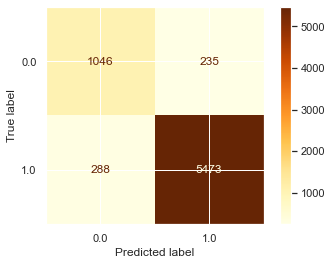

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80      1281
         1.0       0.96      0.95      0.95      5761

    accuracy                           0.93      7042
   macro avg       0.87      0.88      0.88      7042
weighted avg       0.93      0.93      0.93      7042



In [85]:
from sklearn.ensemble import RandomForestClassifier

# Setup the pipeline
steps = [("scaler", StandardScaler()),
         ("randomForet", RandomForestClassifier(n_estimators=400))]

pipeline = Pipeline(steps)

# Setup the hyperparameter grid
param_grid = {'randomForet__bootstrap': [True, False]}

# Instantiate the GridSearchCV object: logreg_cv
random_cv = GridSearchCV(pipeline, param_grid, cv=5)

# Fit it to the data
random_cv.fit(X_train, y_train)

# Compute and print  the confusion matrix and classification report
plot_confusion_matrix(random_cv, X_test, y_test, cmap='YlOrBr')  
plt.show()

y_pred = random_cv.predict(X_test)
print(classification_report(y_test, y_pred))

### 5.4.Support Vector Machine
The **SVM** in particular defines the criterion to be looking for a decision surface that is maximally far away from any data point. This distance from the decision surface to the closest data point determines the margin of the classifier. This method of construction necessarily means that the decision function for an SVM is fully specified by a (usually small) subset of the data which defines the position of the separator. These points are referred to as the support vectors (in a vector space, a point can be thought of as a vector between the origin and that point). Figure 15.1 shows the margin and support vectors for a sample problem. Other data points play no part in determining the decision surface that is chosen.

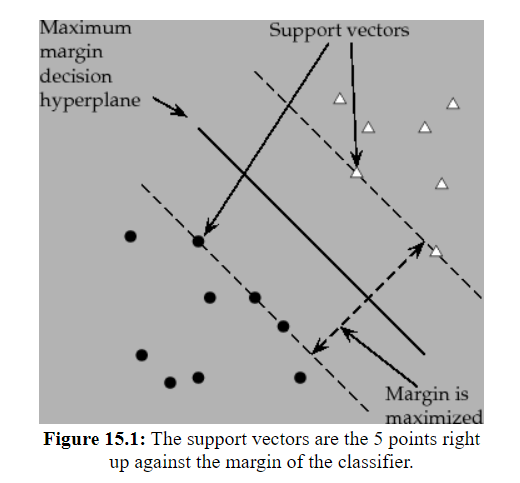
An intuition for large-margin classification.Insisting on a large margin reduces the capacity of the model: the range of angles at which the fat decision surface can be placed is smaller than for a decision hyperplane (cf. vclassline).

Maximizing the **margin** seems good because points near the decision surface represent very uncertain classification decisions: there is almost a 50% chance of the classifier deciding either way. A classifier with a large margin makes no low certainty classification decisions. This gives you a classification safety margin: a slight error in measurement or a slight document variation will not cause a misclassification. 

[Support vector machines: The linearly separable case](https://nlp.stanford.edu/IR-book/html/htmledition/support-vector-machines-the-linearly-separable-case-1.html#:~:text=The%20SVM%20in%20particular%20defines,the%20margin%20of%20the%20classifier.)

C:\Users\Gaye\anaconda3\envs\minimal_ds2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


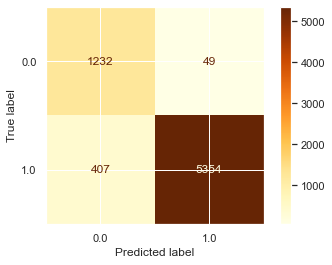

              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84      1281
         1.0       0.99      0.93      0.96      5761

    accuracy                           0.94      7042
   macro avg       0.87      0.95      0.90      7042
weighted avg       0.95      0.94      0.94      7042



In [86]:
from sklearn.svm import SVC

# Setup the pipeline
svm_cv = SVC(C=10, probability=True)

# Fit it to the data
svm_cv.fit(X_train, y_train)

# Compute and print  the confusion matrix and classification report
plot_confusion_matrix(svm_cv, X_test, y_test, cmap='YlOrBr')  
plt.show()

y_pred = svm_cv.predict(X_test)
print(classification_report(y_test, y_pred))

### 5.5.Naive Bayes (Bernoulli)
Naive Bayes is a classification algorithm that may be used to classify binary and multiclass data. It is a supervised classification technique that uses conditional probability to assign class labels to instances/records in order to categorize future objects.
- Multinomial Naive Bayes
This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.
- Bernoulli Naive Bayes
This is similar to the multinomial naive bayes but the predictors are boolean variables.

Bernoulli Naive Bayes will be used.
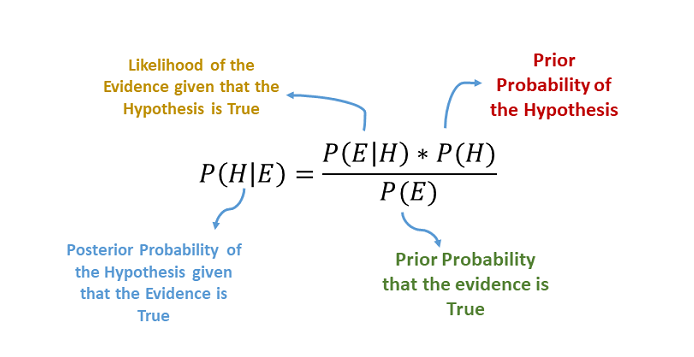

C:\Users\Gaye\anaconda3\envs\minimal_ds2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


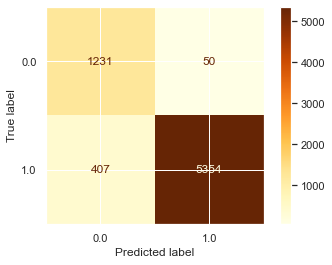

              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84      1281
         1.0       0.99      0.93      0.96      5761

    accuracy                           0.94      7042
   macro avg       0.87      0.95      0.90      7042
weighted avg       0.95      0.94      0.94      7042



In [87]:
from sklearn.naive_bayes import BernoulliNB

# Setup the pipeline
steps = [("scaler", StandardScaler()),
         ("berNB", BernoulliNB())]

pipeline = Pipeline(steps)

# Setup the hyperparameter grid
param_grid = {'berNB__alpha': [0.01, 0.1, 1]}

# Instantiate the GridSearchCV object: logreg_cv
berNB_cv = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

# Fit it to the data
berNB_cv.fit(X_train, y_train)

# Compute and print  the confusion matrix and classification report
plot_confusion_matrix(berNB_cv, X_test, y_test, cmap='YlOrBr')  
plt.show()

y_pred = berNB_cv.predict(X_test)
print(classification_report(y_test, y_pred))

## 6.Conclusion and Model Comparison
**ROC Curve & Area under the ROC curve(AUC)** \
ROC curve provides a nice visual way to assess our classifier's performance.

We have a binary classifier that in fact is just randomly making guesses. The Area under this ROC curve would be 0.5. This is one way in which the AUC is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing.

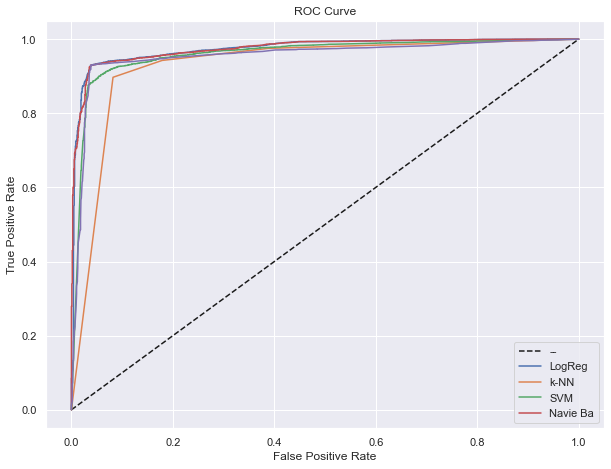

  logreg AUC: 0.97433
    k-NN AUC: 0.93081
Decision AUC: 0.96012
     SVM AUC: 0.97501
Navie Ba AUC: 0.95534


In [88]:
logreg_y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]
knn_y_pred_prob = knn_scaled.predict_proba(X_test)[:,1]
random_cv_y_pred_prob = random_cv.predict_proba(X_test)[:,1]
svm_cv_y_pred_prob = svm_cv.predict_proba(X_test)[:,1]
berNB_cv_y_pred_prob = berNB_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, logreg_y_pred_prob)
fpr2, tpr2, thresholds2 = roc_curve(y_test, knn_y_pred_prob)
fpr3, tpr3, thresholds3 = roc_curve(y_test, random_cv_y_pred_prob)
fpr4, tpr4, thresholds4 = roc_curve(y_test, svm_cv_y_pred_prob)
fpr5, tpr5, thresholds5 = roc_curve(y_test, berNB_cv_y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7.5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.plot(fpr4, tpr4)
plt.plot(fpr5, tpr5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(["--","LogReg", "k-NN", "SVM", "Navie Ba"])
plt.show()

# Compute and print AUC score
print("  logreg AUC: {0:.5f}".format(roc_auc_score(y_test, logreg_y_pred_prob)))
print("    k-NN AUC: {0:.5f}".format(roc_auc_score(y_test, knn_y_pred_prob)))
print("Decision AUC: {0:.5f}".format(roc_auc_score(y_test, random_cv_y_pred_prob)))
print("     SVM AUC: {0:.5f}".format(roc_auc_score(y_test, svm_cv_y_pred_prob)))
print("Navie Ba AUC: {0:.5f}".format(roc_auc_score(y_test, berNB_cv_y_pred_prob)))


**Conclusion**
- With the features in the dataset, it was estimated if a product would be recommeded by a customer using the Logistic Regression, k-Nearest Neighbors, Random Forest, Support Vector Machine, and Naive Bayes(Bernoulli) models. The models were compared using Precision, Recall, F1-score, and ROC values. As a result of the comparison, Support Vector Machine is the best prediction model.